In [1]:
from pureskillgg_datascience_showcase.notebook import setup_notebook

In [2]:
setup_notebook()

PURESKILLGG_TOME_DEFAULT_HEADER_NAME is header_tome.2022-04-01,2022-06-27.may-missing
PURESKILLGG_TOME_DS_TYPE is csds
PURESKILLGG_TOME_COLLECTION_PATH is H:\\CSDS_tomes_ADX\\
PURESKILLGG_TOME_DS_COLLECTION_PATH is H:\\CSDS_daily_ADX\\


In [3]:
# %load ../usual_suspects.py
# pylint: disable=unused-import
import time
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pureskillgg_dsdk.tome import TomeCuratorFs

pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)
pd.set_option("display.min_rows", 150)
# pd.set_option('display.float_format', '{:.4f}'.format)

curator = TomeCuratorFs()


In [4]:
if not os.path.isdir('tmp'):
    os.makedirs('tmp')

In [5]:
df = curator.get_dataframe('channel_player_death.2022-04-01,2022-06-27.may-missing')

2022-06-27 20:39.46 [info     ] Read Manifest: Start           client=tome_reader_fs manifest_key=tome/csds/channel_player_death.2022-04-01,2022-06-27.may-missing/tome prefix=None root_path=H:\\CSDS_tomes_ADX\\
2022-06-27 20:39.46 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/channel_player_death.2022-04-01,2022-06-27.may-missing/tome page_number=0 prefix=None root_path=H:\\CSDS_tomes_ADX\\
2022-06-27 20:39.46 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/channel_player_death.2022-04-01,2022-06-27.may-missing/tome page_number=1 prefix=None root_path=H:\\CSDS_tomes_ADX\\
2022-06-27 20:39.46 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/channel_player_death.2022-04-01,2022-06-27.may-missing/tome page_number=2 prefix=None root_path=H:\\CSDS_tomes_ADX\\
2022-06-27 20:39.46 [info     ] Read Dataframe: Start          client=tome_reader_fs manifest_key=tome/csds/channe

In [6]:
df.head()

,round,tick,player_id,attacker_id,assister_id,weapon_name,is_headshot,penetration_amount,has_replay,is_flash_assist,is_through_smoke,is_attacker_blind,is_noscope,second,player_id_fixed,attacker_id_fixed,assister_id_fixed,player_x_pos,player_y_pos,player_z_pos,player_x_vel,player_y_vel,player_z_vel,player_phi_ang,player_theta_ang,player_weapon_code,player_team_code,attacker_x_pos,attacker_y_pos,attacker_z_pos,attacker_x_vel,attacker_y_vel,attacker_z_vel,attacker_phi_ang,attacker_theta_ang,attacker_weapon_code,attacker_team_code,assister_x_pos,assister_y_pos,assister_z_pos,assister_x_vel,assister_y_vel,assister_z_vel,assister_phi_ang,assister_theta_ang,assister_weapon_code,assister_team_code,match_key,match_id
0,1,9096,9,10,14,tec9,True,0,True,0,0,0,0,142.125003,10.0,4.0,8.0,-1835.295410,2703.892090,32.729809,11.085816,-2.004508,0.000000,90.527344,259.755249,61.0,3.0,-1942.007446,1658.572632,33.996319,0.000000,0.000000,0.0,90.384521,84.710083,30.0,2.0,-2019.945068,1732.041138,32.569851,17.34437,85.217545,0.0,95.586548,32.431641,4.0,2.0,csds/2022/06/19/6536d35c-b571-47e6-b379-c7d2f5...,6536d35c-b571-47e6-b379-c7d2f5b41ef0
1,1,9230,14,12,9,hkp2000,False,0,True,0,0,0,0,144.218753,8.0,7.0,10.0,-2015.461914,1879.420410,0.927596,13.489790,-82.873962,0.000000,90.642700,9.563599,4.0,2.0,-1748.357544,1876.847168,-0.120209,3.361632,-226.292969,0.0,94.658203,178.115845,32.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,csds/2022/06/19/6536d35c-b571-47e6-b379-c7d2f5...,6536d35c-b571-47e6-b379-c7d2f5b41ef0
2,1,9390,12,7,0,glock,False,0,True,0,0,0,0,146.718753,7.0,5.0,NaN,-1720.643677,2085.120117,35.811844,52.518394,44.389130,145.743378,104.194336,153.500977,32.0,3.0,-1930.770386,1982.922363,-2.473912,32.448410,39.005100,0.0,94.784546,25.625610,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,csds/2022/06/19/6536d35c-b571-47e6-b379-c7d2f5...,6536d35c-b571-47e6-b379-c7d2f5b41ef0
3,1,10024,6,8,0,usp_silencer,True,0,True,0,0,0,0,156.625003,2.0,9.0,NaN,-1353.182251,2675.114990,130.031250,3.085949,4.712098,0.000000,104.485474,326.788330,4.0,2.0,-475.196289,2074.478271,-125.182579,0.000000,0.000000,0.0,77.420654,145.783081,61.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,csds/2022/06/19/6536d35c-b571-47e6-b379-c7d2f5...,6536d35c-b571-47e6-b379-c7d2f5b41ef0
4,1,10640,8,7,0,glock,True,0,True,0,0,0,0,166.250003,9.0,5.0,NaN,-775.224060,2531.286621,-79.678223,0.000000,0.000000,0.000000,85.204468,212.843628,61.0,3.0,-1487.972168,2094.771973,0.405727,-55.479168,88.506035,0.0,97.734375,31.420898,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,csds/2022/06/19/6536d35c-b571-47e6-b379-c7d2f5...,6536d35c-b571-47e6-b379-c7d2f5b41ef0


In [7]:
def key_to_MD_date(key):
    date='/'.join(key.split('/')[2:4])
    return date

def key_to_day(key):
    date=key.split('/')[3]
    return date


In [8]:
# date=key_to_MD_date(df.reset_index(drop=True).loc[0,'match_key'])
# print(date)
# date<'06/04'

In [9]:
# date=key_to_day(df.reset_index(drop=True).loc[0,'match_key'])
# print(date)
# date<'04'

In [10]:
df['date_string_month']=df['match_key'].apply(key_to_MD_date)
df['date_string']=df['match_key'].apply(key_to_day)
df['is_in_group']=df['date_string_month']>'06/01'

In [11]:
df.head()

,round,tick,player_id,attacker_id,assister_id,weapon_name,is_headshot,penetration_amount,has_replay,is_flash_assist,is_through_smoke,is_attacker_blind,is_noscope,second,player_id_fixed,attacker_id_fixed,assister_id_fixed,player_x_pos,player_y_pos,player_z_pos,player_x_vel,player_y_vel,player_z_vel,player_phi_ang,player_theta_ang,player_weapon_code,player_team_code,attacker_x_pos,attacker_y_pos,attacker_z_pos,attacker_x_vel,attacker_y_vel,attacker_z_vel,attacker_phi_ang,attacker_theta_ang,attacker_weapon_code,attacker_team_code,assister_x_pos,assister_y_pos,assister_z_pos,assister_x_vel,assister_y_vel,assister_z_vel,assister_phi_ang,assister_theta_ang,assister_weapon_code,assister_team_code,match_key,match_id,date_string_month,date_string,is_in_group
0,1,9096,9,10,14,tec9,True,0,True,0,0,0,0,142.125003,10.0,4.0,8.0,-1835.295410,2703.892090,32.729809,11.085816,-2.004508,0.000000,90.527344,259.755249,61.0,3.0,-1942.007446,1658.572632,33.996319,0.000000,0.000000,0.0,90.384521,84.710083,30.0,2.0,-2019.945068,1732.041138,32.569851,17.34437,85.217545,0.0,95.586548,32.431641,4.0,2.0,csds/2022/06/19/6536d35c-b571-47e6-b379-c7d2f5...,6536d35c-b571-47e6-b379-c7d2f5b41ef0,06/19,19,True
1,1,9230,14,12,9,hkp2000,False,0,True,0,0,0,0,144.218753,8.0,7.0,10.0,-2015.461914,1879.420410,0.927596,13.489790,-82.873962,0.000000,90.642700,9.563599,4.0,2.0,-1748.357544,1876.847168,-0.120209,3.361632,-226.292969,0.0,94.658203,178.115845,32.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,csds/2022/06/19/6536d35c-b571-47e6-b379-c7d2f5...,6536d35c-b571-47e6-b379-c7d2f5b41ef0,06/19,19,True
2,1,9390,12,7,0,glock,False,0,True,0,0,0,0,146.718753,7.0,5.0,NaN,-1720.643677,2085.120117,35.811844,52.518394,44.389130,145.743378,104.194336,153.500977,32.0,3.0,-1930.770386,1982.922363,-2.473912,32.448410,39.005100,0.0,94.784546,25.625610,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,csds/2022/06/19/6536d35c-b571-47e6-b379-c7d2f5...,6536d35c-b571-47e6-b379-c7d2f5b41ef0,06/19,19,True
3,1,10024,6,8,0,usp_silencer,True,0,True,0,0,0,0,156.625003,2.0,9.0,NaN,-1353.182251,2675.114990,130.031250,3.085949,4.712098,0.000000,104.485474,326.788330,4.0,2.0,-475.196289,2074.478271,-125.182579,0.000000,0.000000,0.0,77.420654,145.783081,61.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,csds/2022/06/19/6536d35c-b571-47e6-b379-c7d2f5...,6536d35c-b571-47e6-b379-c7d2f5b41ef0,06/19,19,True
4,1,10640,8,7,0,glock,True,0,True,0,0,0,0,166.250003,9.0,5.0,NaN,-775.224060,2531.286621,-79.678223,0.000000,0.000000,0.000000,85.204468,212.843628,61.0,3.0,-1487.972168,2094.771973,0.405727,-55.479168,88.506035,0.0,97.734375,31.420898,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,csds/2022/06/19/6536d35c-b571-47e6-b379-c7d2f5...,6536d35c-b571-47e6-b379-c7d2f5b41ef0,06/19,19,True


In [12]:
index = df['is_in_group']==True

In [13]:
print(len(df))

2447735


In [14]:
set(df['weapon_name'])

{'ak47',
 'aug',
 'awp',
 'bayonet',
 'bizon',
 'cz75a',
 'deagle',
 'decoy',
 'elite',
 'famas',
 'fiveseven',
 'flashbang',
 'g3sg1',
 'galilar',
 'glock',
 'hegrenade',
 'hkp2000',
 'incgrenade',
 'inferno',
 'knife',
 'knife_butterfly',
 'knife_canis',
 'knife_cord',
 'knife_css',
 'knife_falchion',
 'knife_flip',
 'knife_gut',
 'knife_gypsy_jackknife',
 'knife_karambit',
 'knife_m9_bayonet',
 'knife_outdoor',
 'knife_push',
 'knife_skeleton',
 'knife_stiletto',
 'knife_survival_bowie',
 'knife_t',
 'knife_tactical',
 'knife_ursus',
 'knife_widowmaker',
 'm249',
 'm4a1',
 'm4a1_silencer',
 'm4a1_silencer_off',
 'mac10',
 'mag7',
 'molotov',
 'mp5sd',
 'mp7',
 'mp9',
 'negev',
 'nova',
 'p250',
 'p90',
 'planted_c4',
 'revolver',
 'sawedoff',
 'scar20',
 'sg556',
 'smokegrenade',
 'ssg08',
 'taser',
 'tec9',
 'trigger_hurt',
 'ump45',
 'usp_silencer',
 'usp_silencer_off',
 'world',
 'worldspawn',
 'xm1014'}

In [15]:
df['weapon_name'].value_counts()

ak47                     751163
m4a1_silencer            461699
awp                      293679
usp_silencer             123471
deagle                   103609
glock                     94900
mp9                       63898
m4a1                      61216
mac10                     54904
galilar                   52753
famas                     42551
ssg08                     42236
p250                      34597
p90                       27418
tec9                      22112
sg556                     19745
aug                       18380
mp7                       17951
hegrenade                 17444
fiveseven                 15182
inferno                   11147
ump45                      9867
planted_c4                 9796
xm1014                     9624
hkp2000                    9411
mp5sd                      9046
mag7                       8673
negev                      8317
bizon                      7778
world                      7361
elite                      7106
nova    

In [16]:
silenced_kills = (
    df[index&((df['weapon_name']=='m4a1_silencer')|(df['weapon_name']=='m4a1_silencer_off'))]
    .groupby('date_string',as_index=False)
    .count()[['date_string','round']]
    .rename(columns={'round':'m4a1_kills'})
)

In [17]:
total_kills = (
    df[index]
    .groupby('date_string',as_index=False)
    .count()[['date_string','round']]
    .rename(columns={'round':'total_kills'})
)

In [18]:
m4a4_kills = (
    df[index&(df['weapon_name']=='m4a1')]
    .groupby('date_string',as_index=False)
    .count()[['date_string','round']]
    .rename(columns={'round':'m4a4_kills'})
)

In [19]:
df=pd.merge(silenced_kills, total_kills, on='date_string').merge(m4a4_kills, on='date_string')

In [20]:
df['unsilenced_fraction']=df['m4a4_kills']/df['total_kills']
df['silenced_fraction']=df['m4a1_kills']/df['total_kills']

In [21]:
df=df[df['date_string']!='26']

In [22]:
patch_date='14'

In [23]:
df

,date_string,m4a1_kills,total_kills,m4a4_kills,unsilenced_fraction,silenced_fraction
0,02,11587,58733,1265,0.021538,0.197283
1,03,9753,50284,1027,0.020424,0.193958
2,04,8764,45469,1197,0.026326,0.192747
3,05,8452,43698,1067,0.024418,0.193418
4,06,10092,49847,987,0.019801,0.202460
5,07,8742,45094,956,0.021200,0.193862
6,08,7460,36760,691,0.018798,0.202938
7,09,6485,31985,534,0.016695,0.202751
8,10,6865,36855,933,0.025315,0.186271
9,11,7991,40681,799,0.019641,0.196431


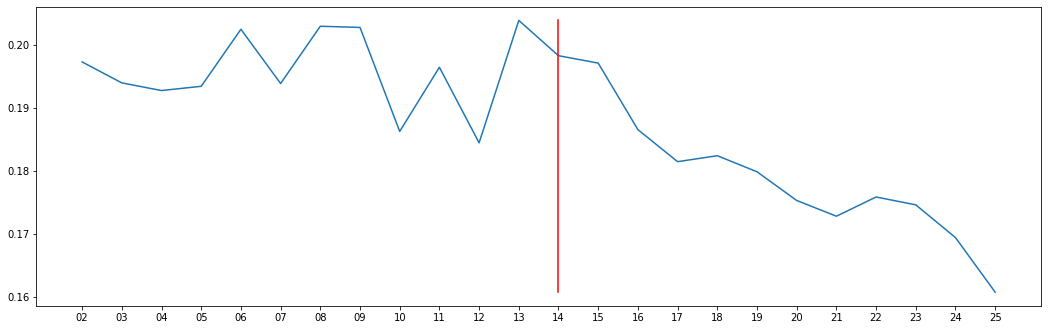

In [32]:
plt.rcParams["figure.figsize"] = (18,5.5)
y=df['silenced_fraction']
plt.plot(df['date_string'], y)
plt.plot([patch_date,patch_date], [min(y),max(y)],color='red')

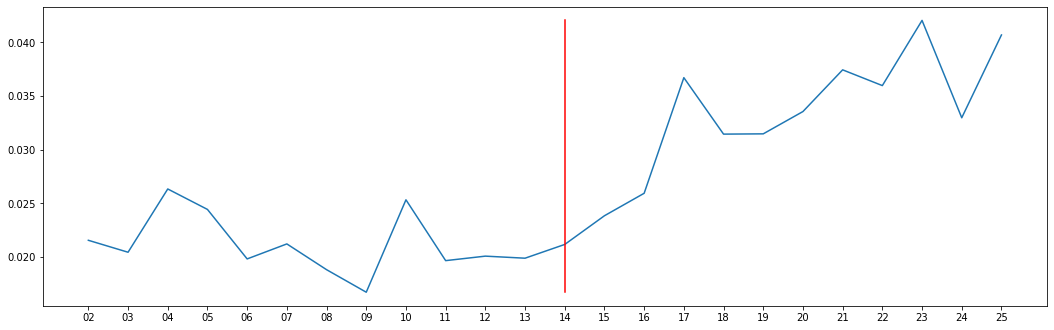

In [33]:
y=df['unsilenced_fraction']
plt.plot(df['date_string'], y)
plt.plot([patch_date,patch_date], [min(y),max(y)],color='red')

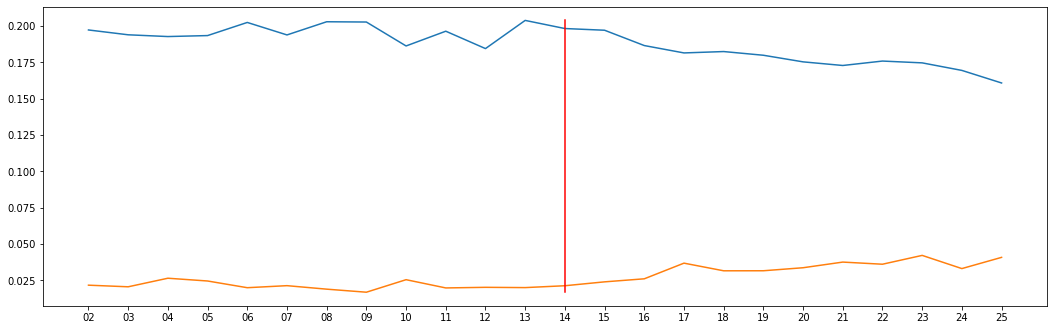

In [34]:
plt.plot(df['date_string'], df['silenced_fraction'])
plt.plot(df['date_string'], df['unsilenced_fraction'])
y=[*df['silenced_fraction'],*df['unsilenced_fraction']]
plt.plot([patch_date,patch_date], [min(y),max(y)],color='red')

In [27]:
def add_attribution(ax):
    ax.text(1.01, -0.15, 'Data provided by PureSkill.gg', 
            horizontalalignment='right',
            verticalalignment='center',
            transform=ax.transAxes, fontsize = 10)
    
def add_labels(ax,loc='upper left'):
    ax.set_xlabel("Day in June 2022")
    ax.set_ylabel("% of Kills")
    ax.grid(True)
    ax.legend(loc=loc)
#     labels = [item.get_text() for item in ax.get_xticklabels()]
#     labels = [label[2:] for label in labels]
#     ax.set_xticklabels(labels)

def do_avg(ax, index, x, y, label="Before"):
    avg = sum(y[index])/len(y[index])
    ax.plot([min(x[index]),max(x[index])], [avg,avg], '--',  label = label)
    return avg


def plot_update_line(ax,patch_date,y):
    ax.plot([patch_date,patch_date], [min(y),max(y)],color='red', label = "Update")

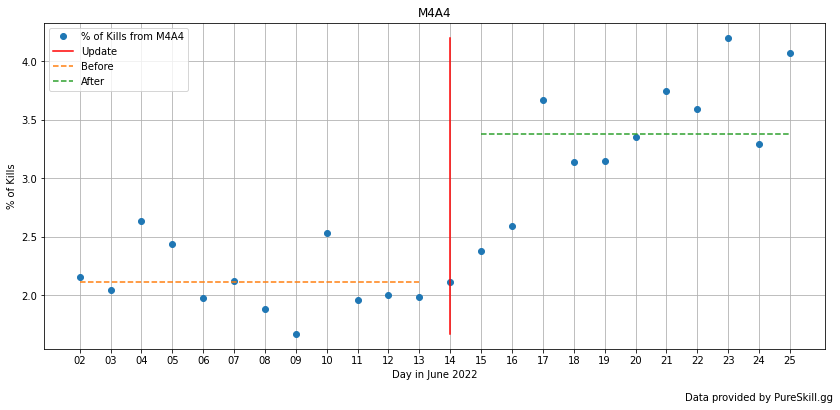

In [28]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot()
y=100*df['unsilenced_fraction']
x=df['date_string']
ax.plot(x, y, 'o', label="% of Kills from M4A4")
plot_update_line(ax,patch_date,y)

index = x < patch_date
avg_before = do_avg(ax, index, x, y)

index = x > patch_date
avg_after = do_avg(ax, index, x, y, label= "After")

add_labels(ax)
add_attribution(ax)

ax.set_title("M4A4")
ax.set_facecolor('white')
fig.savefig('tmp/m4a4.png', dpi=300)

In [29]:
print('avg before',avg_before)
print('avg after',avg_after)
print('avg change',round(100*(avg_after-avg_before)/avg_before))

avg before 2.1173553450717626
avg after 3.3820679257130384
avg change 60


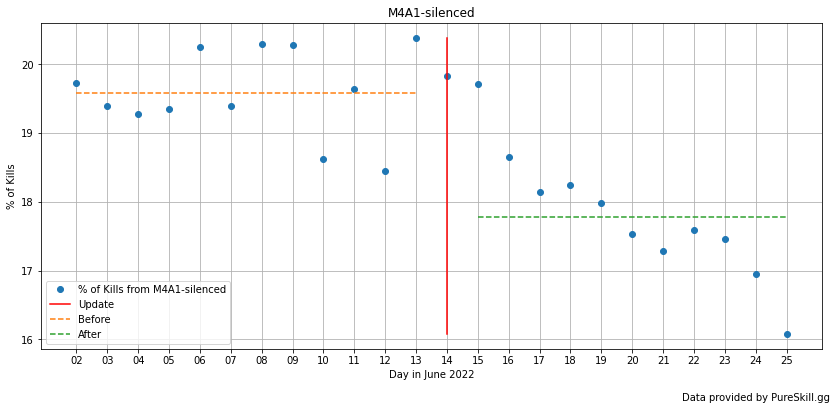

In [30]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot()
y=100*df['silenced_fraction']
x=df['date_string']
ax.plot(x, y, 'o', label="% of Kills from M4A1-silenced")
plot_update_line(ax,patch_date,y)

index = x < patch_date
avg_before = do_avg(ax, index, x, y)

index = x > patch_date
avg_after = do_avg(ax, index, x, y, label= "After")

add_labels(ax,loc='lower left')
add_attribution(ax)

ax.set_title("M4A1-silenced")
ax.set_facecolor('white')
fig.savefig('tmp/m4a1.png', dpi=300)

In [31]:
print('avg before',avg_before)
print('avg after',avg_after)
print('avg change',round(100*(avg_after-avg_before)/avg_before))

avg before 19.58700612366369
avg after 17.784123049919575
avg change -9
